## SARS-2 Austria 

C. Möstl, Graz, https://twitter.com/chrisoutofspace

data source for Austria
https://orf.at/corona/stories/3157533/

data source for South Korea
https://www.worldometers.info/coronavirus/country/south-korea/

for converting to script on the command line: jupyter nbconvert --to script plot_cases.ipynb

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sunpy.time import parse_time
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import set_input_here


import importlib
importlib.reload(set_input_here)
from set_input_here import t_start_string, t_end_string, cases_list, filename, country, south_korea_offset

def expon(x, a, k, b):
    return a*np.exp(k*x) + b

def linear(x, k, b):
    return k*x + b


def gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))



sns.set_style('darkgrid')
sns.set_context('paper')   

print(country)
print(t_start_string)
print(t_end_string)
print('total cases:',cases_list)
print(south_korea_offset)

Austria
2020-02-25 23:00
2020-04-04 23:00
total cases: [2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016, 1332, 1646, 2053, 2388, 2814, 3244, 3924, 4876, 5560, 6398, 7399, 7995, 8536, 9377, 9974, 10482, 10967, 11383, 11665]
21



### Austria

In [10]:
t_start=parse_time(t_start_string).datetime
t_end=parse_time(t_end_string).datetime

dates=parse_time([t_start + datetime.timedelta(days=1*n) for n in range((t_end - t_start).days+1)]).datetime
cases=np.array(cases_list)

print(parse_time(dates).iso)
print('total cases ',cases)

#define daily new cases
newcases1=np.diff(cases,prepend=0)
print('daily new cases:',newcases1)

#do running mean with 4 day window for moving averages
N=4
ypad = np.pad(newcases1, (N//2, N-1-N//2), mode='edge')
newcases = np.convolve(ypad, np.ones((N,))/N, mode='valid') 
print('4 day running mean of daily new cases',newcases)



dates1=parse_time(dates).plot_date
dates1=dates1-dates1[0] 

t_end2=parse_time('2020-04-30 23:00').datetime

dates_fut=parse_time([t_start + datetime.timedelta(days=n) for n in range((t_end2 - t_start).days)]).plot_date
dates_fut1=dates_fut-dates_fut[0]

now=datetime.datetime.utcnow().strftime("%Y-%b-%d %H:%M")
#now=dates[-1].strftime("%Y-%b-%d %H:%M")

['2020-02-25 23:00:00.000' '2020-02-26 23:00:00.000'
 '2020-02-27 23:00:00.000' '2020-02-28 23:00:00.000'
 '2020-02-29 23:00:00.000' '2020-03-01 23:00:00.000'
 '2020-03-02 23:00:00.000' '2020-03-03 23:00:00.000'
 '2020-03-04 23:00:00.000' '2020-03-05 23:00:00.000'
 '2020-03-06 23:00:00.000' '2020-03-07 23:00:00.000'
 '2020-03-08 23:00:00.000' '2020-03-09 23:00:00.000'
 '2020-03-10 23:00:00.000' '2020-03-11 23:00:00.000'
 '2020-03-12 23:00:00.000' '2020-03-13 23:00:00.000'
 '2020-03-14 23:00:00.000' '2020-03-15 23:00:00.000'
 '2020-03-16 23:00:00.000' '2020-03-17 23:00:00.000'
 '2020-03-18 23:00:00.000' '2020-03-19 23:00:00.000'
 '2020-03-20 23:00:00.000' '2020-03-21 23:00:00.000'
 '2020-03-22 23:00:00.000' '2020-03-23 23:00:00.000'
 '2020-03-24 23:00:00.000' '2020-03-25 23:00:00.000'
 '2020-03-26 23:00:00.000' '2020-03-27 23:00:00.000'
 '2020-03-28 23:00:00.000' '2020-03-29 23:00:00.000'
 '2020-03-30 23:00:00.000' '2020-03-31 23:00:00.000'
 '2020-04-01 23:00:00.000' '2020-04-02 23:00:0

#### Exponential and Gaussian fits

In [11]:
#exponential fit for total cases
#for morning numbers
#param = scipy.optimize.curve_fit(expon, dates1[0:-1], cases[0:-1] )
#afternoon numbers
param = scipy.optimize.curve_fit(expon, dates1, cases )
p1=param[0][0]
p2=param[0][1]
p3=param[0][2]
fit=expon(dates_fut1,p1,p2,p3)

print()
print('Exponential fit parameters:',param[0])


#gaussian fits for smoothed daily new cases

paramg = scipy.optimize.curve_fit(gaussian, dates1, newcases )
ygfit=gaussian(dates_fut1,paramg[0][0],paramg[0][1],paramg[0][2])
#plt.plot_date(dates,newcases)
#plt.plot_date(dates_fut,ygfit,'-k')
print('Gaussian fit parameters:',paramg[0])



Exponential fit parameters: [ 5.68563151e+02  8.31173592e-02 -1.23651294e+03]
Gaussian fit parameters: [766.09740655  31.1306778    6.51420503]


### South Korea

In [12]:
t_start_sk=parse_time('2020-02-15 20:00').datetime
t_end_sk=parse_time('2020-03-28 20:00').datetime

t_start_sk=t_start_sk+datetime.timedelta(days=south_korea_offset)
t_end_sk=t_end_sk+datetime.timedelta(days=south_korea_offset)

dates_sk=parse_time([t_start_sk + datetime.timedelta(days=1*n) for n in range((t_end_sk - t_start_sk).days)]).datetime
dates_sk1=parse_time([t_start_sk + datetime.timedelta(days=1*n) for n in range((t_end_sk - t_start_sk).days)]).plot_date
dates_sk1=dates_sk1-dates_sk1[0] 

print(parse_time(dates_sk).iso)
cases_sk=np.array([28, 29, 30, 31, 58, 111, 209, 436,602, 833, 977, 1261, 1766, 2337,\
                   3150,3736, 4335,5186,5621,6284,6593,7041,7313,7478,7513,7755,7869,\
                   7979,8086,8162,8236,8320,   8413, 8565,8652,8799,8897,8961,9037,9137,9241,9332])
#print(cases_sk)
#print(len(cases_sk),len(dates_sk))
newcases_sk1=np.diff(cases_sk,prepend=0)
print(newcases_sk1)

#do running mean with 4 day window for moving averages, N is defined earlier
ypad = np.pad(newcases_sk1, (N//2, N-1-N//2), mode='edge')
newcases_sk = np.convolve(ypad, np.ones((N,))/N, mode='valid') 
print('smoothed daily newcases:',newcases_sk)



#gaussian fits for daily new cases South Korea
print(dates_sk1)
print(cases_sk)
paramg_sk = scipy.optimize.curve_fit(gaussian, dates_sk1, newcases_sk )
ygfit_sk=gaussian(dates_sk1,paramg_sk[0][0],paramg_sk[0][1],paramg_sk[0][2])
#plt.plot_date(dates,newcases)
#plt.plot_date(dates_fut,ygfit,'-k')
print('Gaussian fit parameters:',paramg_sk[0])


['2020-03-07 20:00:00.000' '2020-03-08 20:00:00.000'
 '2020-03-09 20:00:00.000' '2020-03-10 20:00:00.000'
 '2020-03-11 20:00:00.000' '2020-03-12 20:00:00.000'
 '2020-03-13 20:00:00.000' '2020-03-14 20:00:00.000'
 '2020-03-15 20:00:00.000' '2020-03-16 20:00:00.000'
 '2020-03-17 20:00:00.000' '2020-03-18 20:00:00.000'
 '2020-03-19 20:00:00.000' '2020-03-20 20:00:00.000'
 '2020-03-21 20:00:00.000' '2020-03-22 20:00:00.000'
 '2020-03-23 20:00:00.000' '2020-03-24 20:00:00.000'
 '2020-03-25 20:00:00.000' '2020-03-26 20:00:00.000'
 '2020-03-27 20:00:00.000' '2020-03-28 20:00:00.000'
 '2020-03-29 20:00:00.000' '2020-03-30 20:00:00.000'
 '2020-03-31 20:00:00.000' '2020-04-01 20:00:00.000'
 '2020-04-02 20:00:00.000' '2020-04-03 20:00:00.000'
 '2020-04-04 20:00:00.000' '2020-04-05 20:00:00.000'
 '2020-04-06 20:00:00.000' '2020-04-07 20:00:00.000'
 '2020-04-08 20:00:00.000' '2020-04-09 20:00:00.000'
 '2020-04-10 20:00:00.000' '2020-04-11 20:00:00.000'
 '2020-04-12 20:00:00.000' '2020-04-13 20:00:0

current total cases Austria 11665


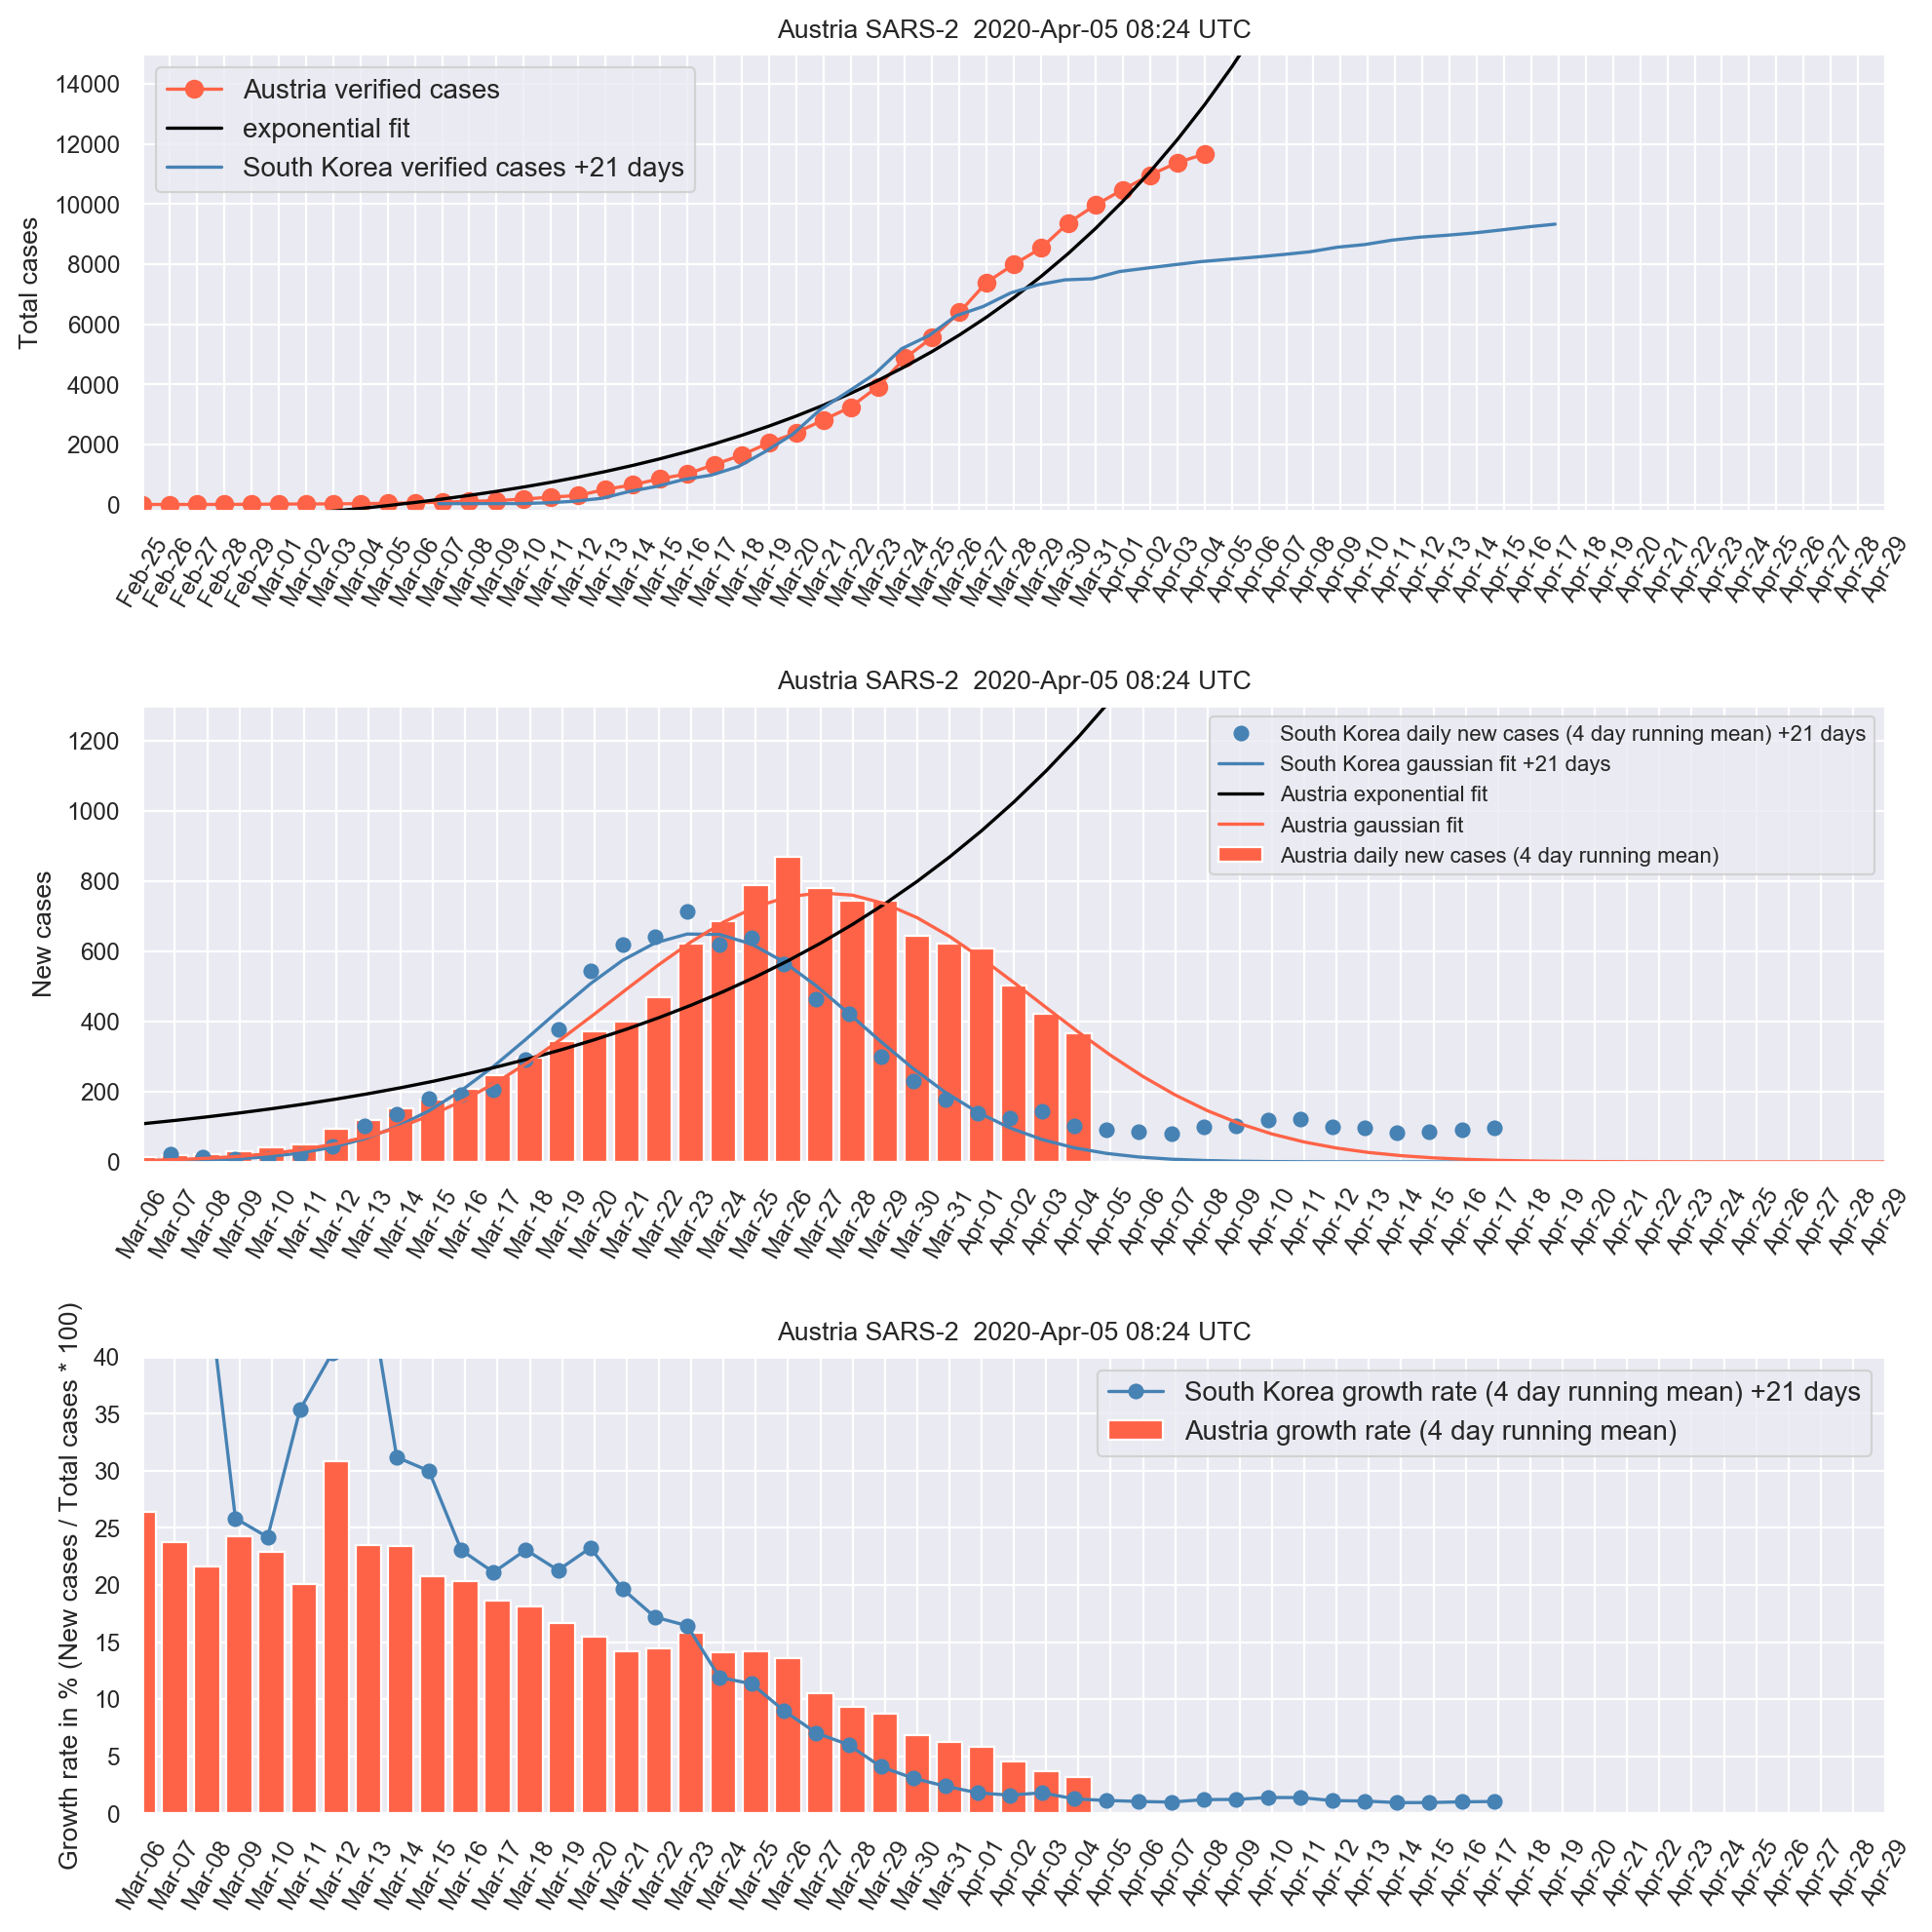

In [13]:
plt.close('all')
plt.figure(1,figsize=(10,10),dpi=200)


### 1
ax1 = plt.subplot(311) 

ax1.plot(dates,cases,marker='o',color='tomato',label=country+' verified cases',markersize=6)
ax1.plot(dates_fut,fit,linestyle='-',color='k',label='exponential fit')
#ax2.plot(dates_fut,np.gradient(fitl),color='black',label='linear fit')
ax1.plot(dates_sk,cases_sk,linestyle='-',color='steelblue',label='South Korea verified cases +'+str(south_korea_offset)+' days')

ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
ax1.set_xlim([dates_fut[10]+10,dates_fut[-1]])
plt.xticks(rotation=60)
plt.ylabel('Total cases')
plt.ylim(-200,15000)
plt.title(country+' SARS-2  '+now+ ' UTC')
plt.legend(loc=2, fontsize=10)
ax1.set_xticks(dates_fut)

### 2 
ax2 = plt.subplot(312) 
ax2.plot(dates_sk,newcases_sk,linestyle='',marker='o',color='steelblue',label='South Korea daily new cases (4 day running mean) +'+str(south_korea_offset)+' days')
#ax2.bar(dates_sk,np.gradient(cases_sk),color='steelblue',label='South Korea daily new cases +'+str(south_korea_offset)+' days')
ax2.plot(dates_sk,ygfit_sk,'steelblue',label='South Korea gaussian fit +'+str(south_korea_offset)+' days')

ax2.bar(dates,newcases,color='tomato',label=country+' daily new cases (4 day running mean)')
ax2.plot(dates_fut,np.gradient(fit),color='black',label=country+' exponential fit')
ax2.plot(dates_fut,ygfit,color='tomato',linestyle='-',label=country+' gaussian fit')

ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
plt.xticks(rotation=60)
plt.ylabel('New cases')
plt.title(country+' SARS-2  '+now + ' UTC')
ax2.set_xticks(dates_fut)
plt.ylim(0,1300)

ax2.set_xlim([dates_fut[0]+10,dates_fut[-1]])

plt.legend(loc=1,fontsize=8)


### 3 
#define growth rate as newcases/cases
grow=newcases/cases*100
grow_sk=newcases_sk/cases_sk*100

ax3 = plt.subplot(313) 
#ax2.bar(dates_sk,np.gradient(cases_sk),color='steelblue',label='South Korea daily new cases +'+str(south_korea_offset)+' days')
#ax2.plot(dates_sk,ygfit_sk,'steelblue',label='South Korea gaussian fit +'+str(south_korea_offset)+' days')
ax3.plot(dates_sk,grow_sk,linestyle='-',marker='o',color='steelblue',label='South Korea growth rate (4 day running mean) +'+str(south_korea_offset)+' days')

ax3.bar(dates,grow,color='tomato',label=country+' growth rate (4 day running mean)')
#ax3.plot(dates,grow,color='tomato',label=country+' growth rate (4 day running mean)')


#ax2.plot(dates_fut,np.gradient(fit),color='black',label=country+' exponential fit')
#ax2.plot(dates_fut,ygfit,color='tomato',linestyle='-',label=country+' gaussian fit')

ax3.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
plt.xticks(rotation=60)
plt.ylabel('Growth rate in % (New cases / Total cases * 100)')
plt.title(country+' SARS-2  '+now + ' UTC')
ax3.set_xticks(dates_fut)
plt.ylim(0,40)

ax3.set_xlim([dates_fut[0]+10,dates_fut[-1]])

plt.legend(loc=1,fontsize=10)



plt.tight_layout()
print('current total cases '+country,cases[-1])

plt.savefig(filename)